In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Lets get the dataaa;I am using standard terms
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

Data Exploration

In [5]:
#Now to check the data(also called EDA)
print(train_df.head())
print(train_df.describe())
print(train_df.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
#convert data into a dataframe
data = pd.read_csv('train.csv', index_col='Id')

In [7]:
#Shape of the data frame
print('Data frame shape: ', data.shape)
print("Data frame contains %2d rows, and %d columns (attributes)" % (data.shape[0], data.shape[1]))

Data frame shape:  (1460, 80)
Data frame contains 1460 rows, and 80 columns (attributes)


In [8]:
#more info
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# print the first 5 rows of the dataframe
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Cleaning

In [10]:
#Attribute types
print(data.dtypes.to_string())

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [11]:
#Exclude non numerical attributes
num_data = data.select_dtypes(exclude=['object'])
print(num_data.dtypes.to_string())

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64


In [12]:
#Nan
cols_with_nan = num_data.isnull().sum()
print("NaN values for the training data frame :")
print(cols_with_nan[cols_with_nan>0])

NaN values for the training data frame :
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [13]:
#filling nan with means
clean_data = num_data.fillna(num_data.mean())
#re
cols_with_nans = clean_data.isnull().sum()
print("NaN values for the training data frame :")
print(cols_with_nans[cols_with_nans>0])

NaN values for the training data frame :
Series([], dtype: int64)


In [14]:
#Shape of clean data
print('Shape of the data: ', clean_data.shape)
print('Dframe contains %d rows, and %d columns (attributes)' % (clean_data.shape[0], clean_data.shape[1]))

Shape of the data:  (1460, 37)
Dframe contains 1460 rows, and 37 columns (attributes)


Instead of doing it step by step, data cleaning in one go

Data Visualization

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Identify numerical and categorical columns
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_df.select_dtypes(include=['object']).columns

# Handle missing values for numerical features
train_df = train_df.fillna({col: train_df[col].mean() for col in numerical_features})
test_df = test_df.fillna({col: test_df[col].mean() for col in numerical_features if col in test_df.columns})

# Handle missing values for categorical features
train_df = train_df.fillna({col: train_df[col].mode()[0] for col in categorical_features})
test_df = test_df.fillna({col: test_df[col].mode()[0] for col in categorical_features if col in test_df.columns})

# Encode categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

# Separate features and target
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Display the first few rows of the preprocessed data to confirm
print(X.head())
print(y.head())

   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      0         3   
1   2          20         3         80.0     9600       1      0         3   
2   3          60         3         68.0    11250       1      0         0   
3   4          70         3         60.0     9550       1      0         0   
4   5          60         3         84.0    14260       1      0         0   

   LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0            3          0  ...            0         0       2      2   
1            3          0  ...            0         0       2      2   
2            3          0  ...            0         0       2      2   
3            3          0  ...            0         0       2      2   
4            3          0  ...            0         0       2      2   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            2        0       2

Histograms of Numerical Features

<Figure size 2000x1500 with 0 Axes>

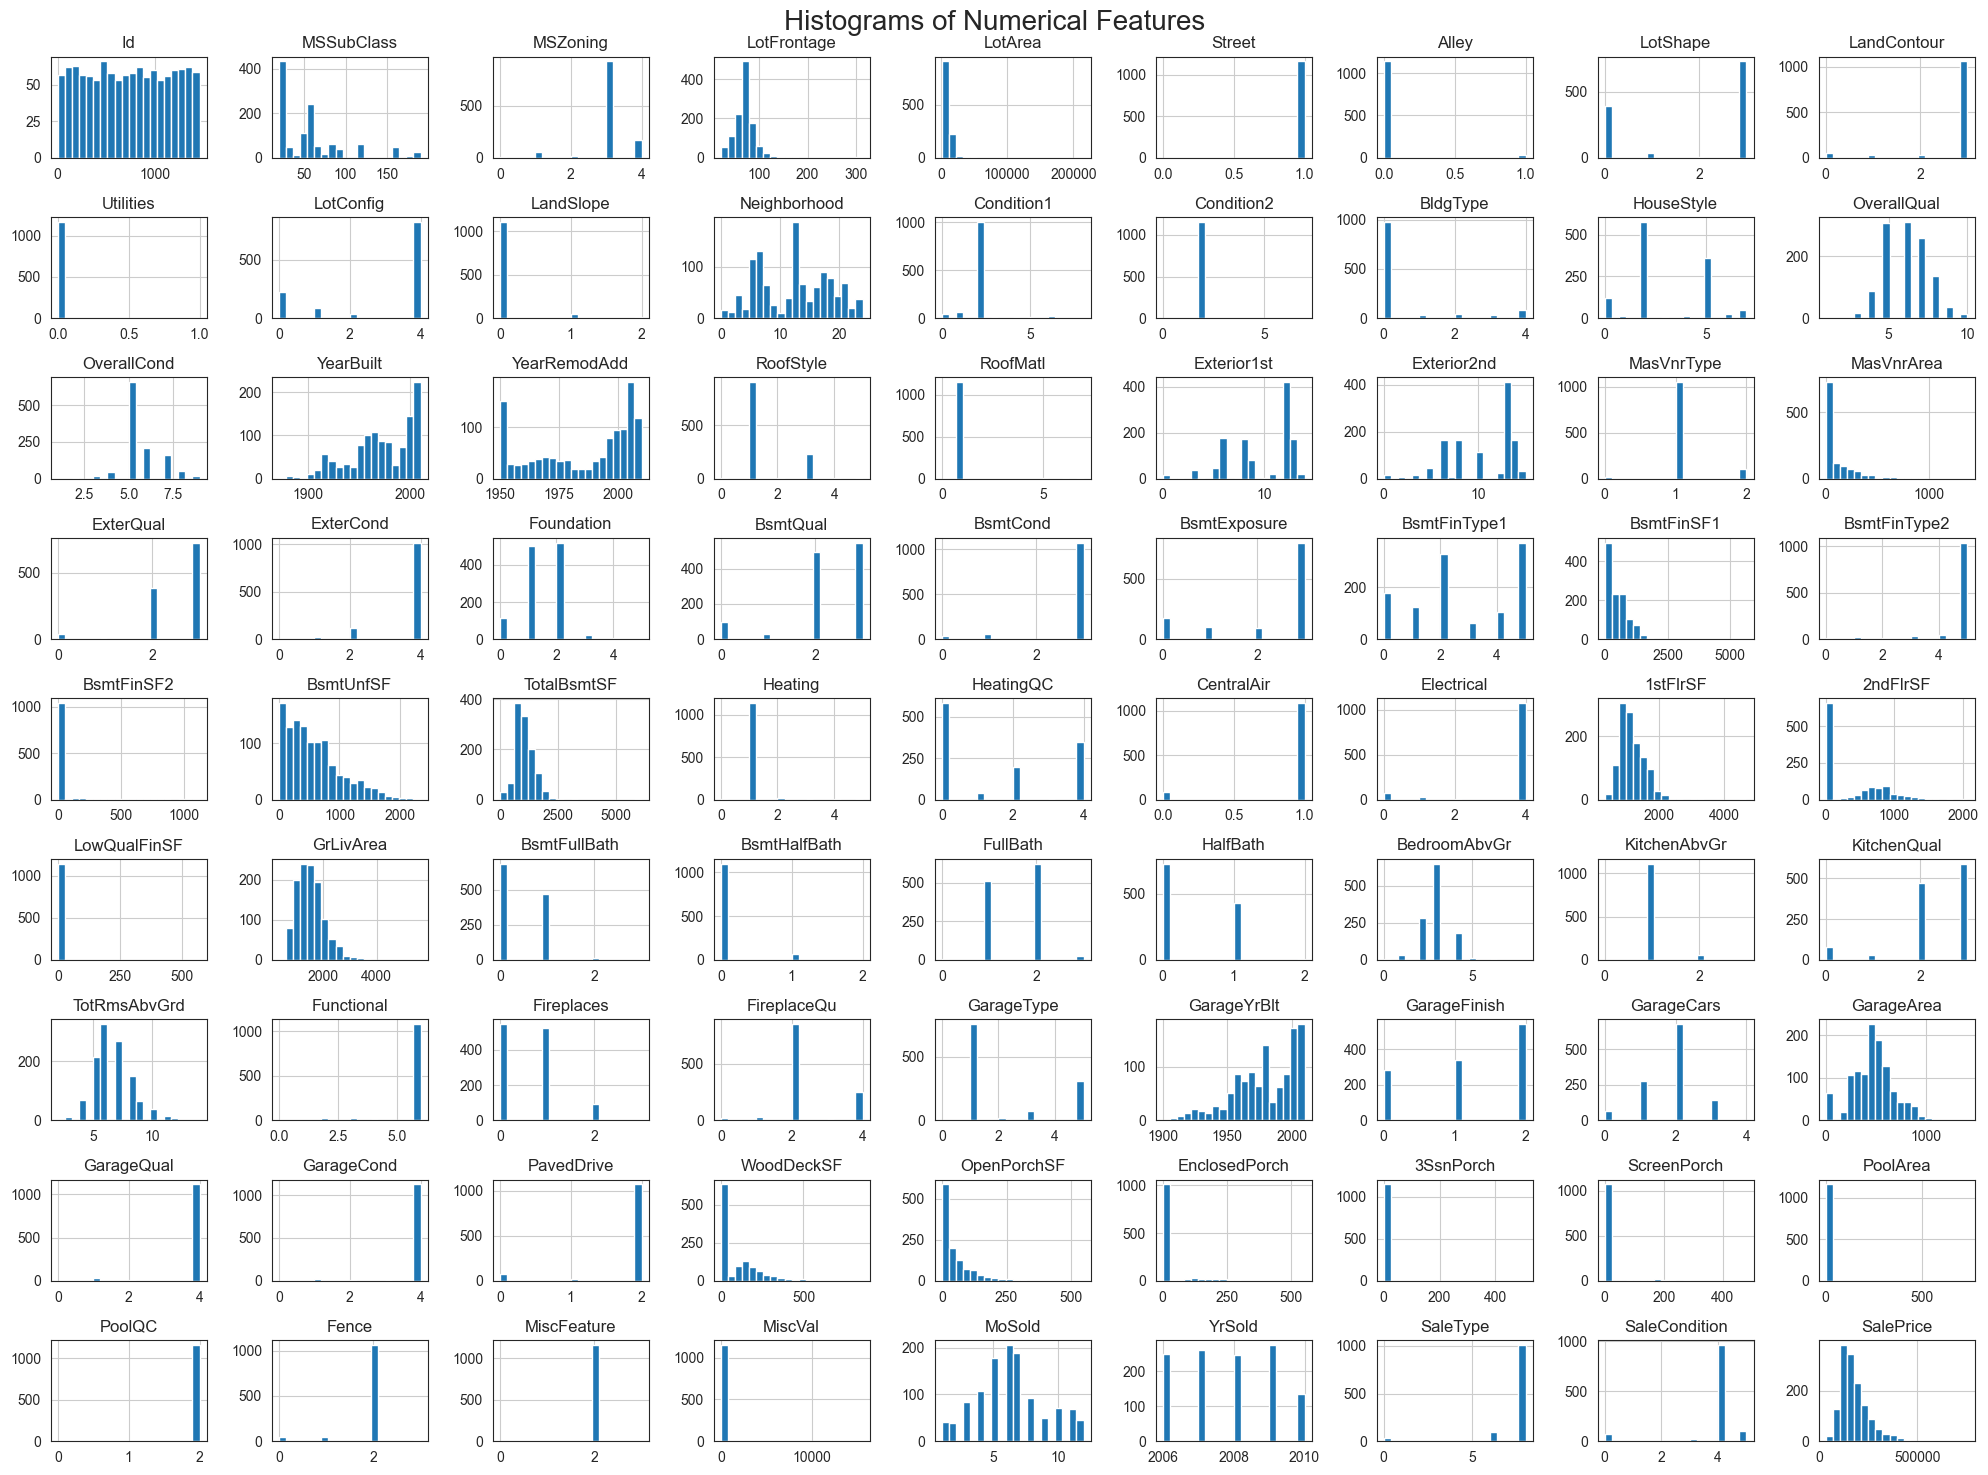

In [91]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Set the aesthetic style of the plots
sns.set_style("white")

# Plot histograms
plt.figure(figsize=(20, 15))
df.hist(bins=20, figsize=(20, 15), layout=(9, 9))
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.tight_layout()
plt.show()

Boxplot of Overall Quality vs Sale Price

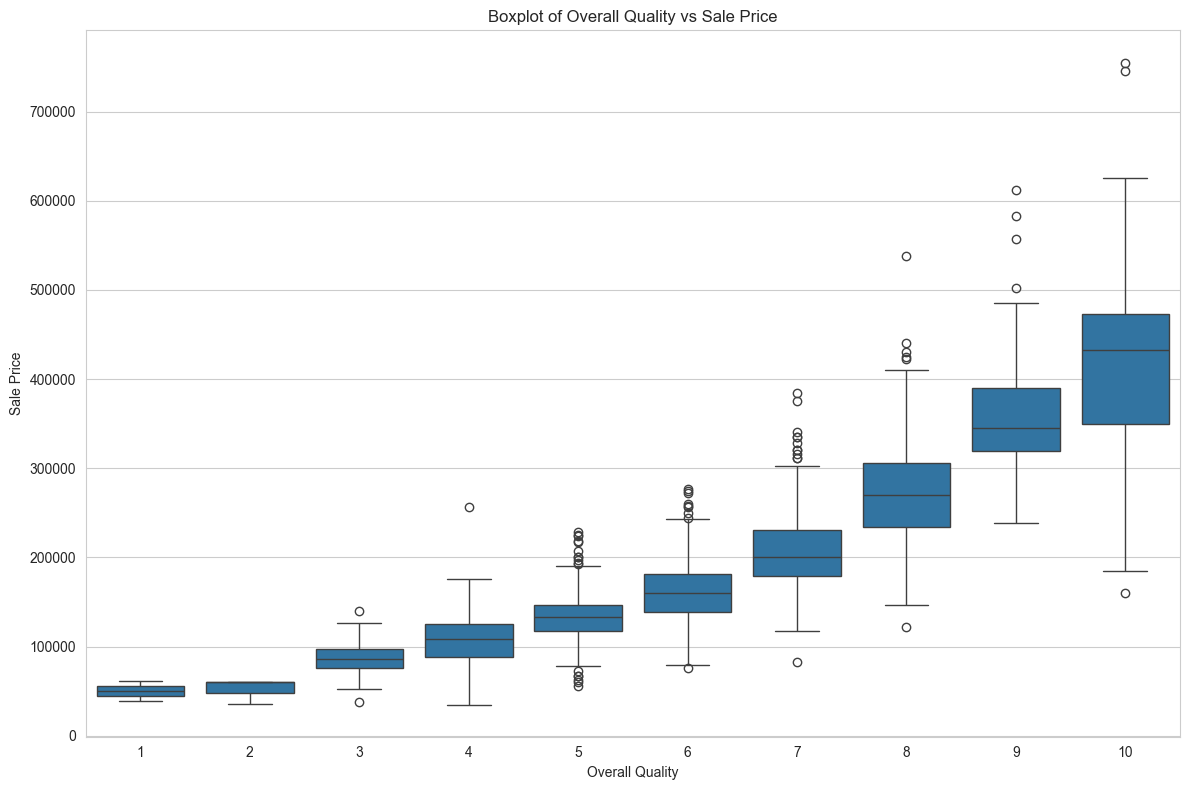

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Boxplot of Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

Scatter Plot of Living Area vs Sale Price

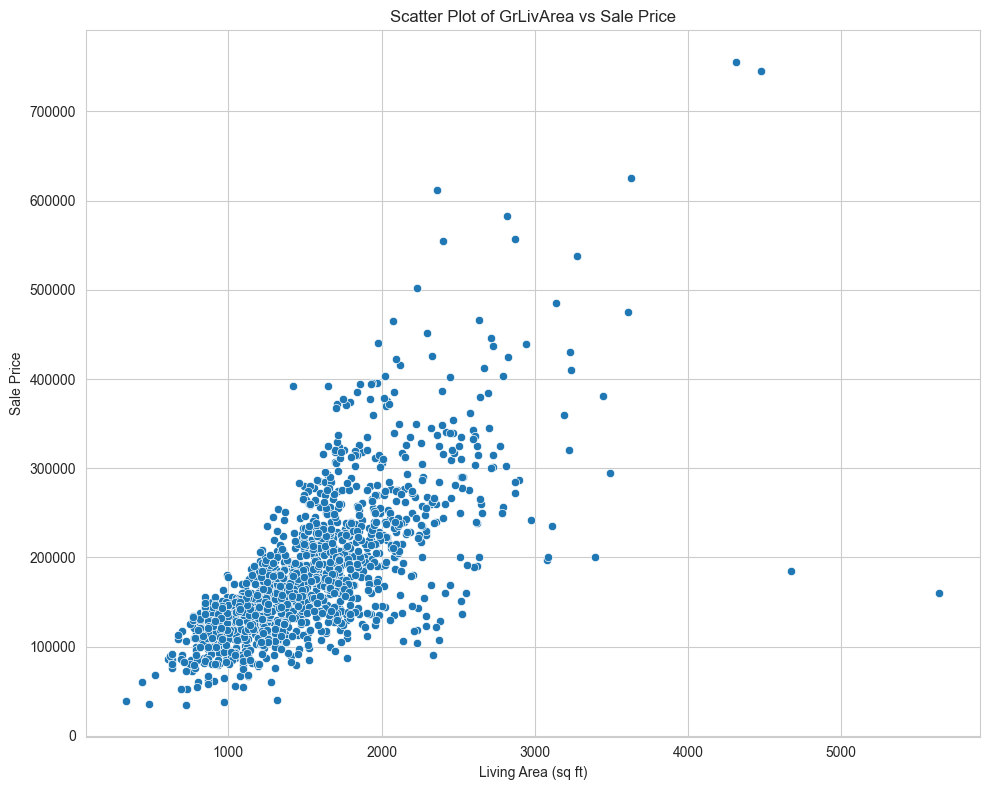

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Scatter Plot of GrLivArea vs Sale Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()


Bar Plot of Sale Condition Counts

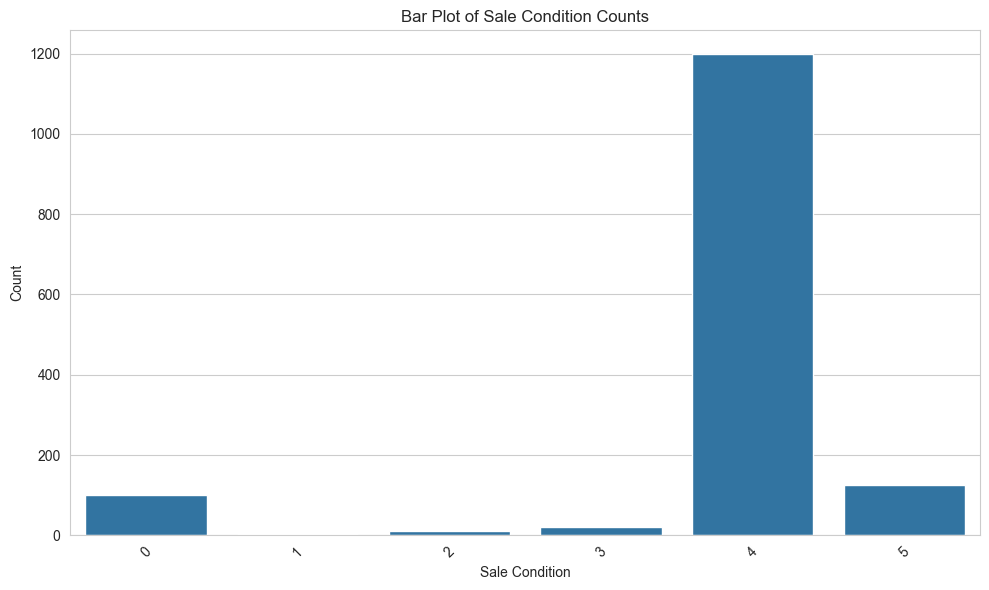

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SaleCondition', data=df)
plt.title('Bar Plot of Sale Condition Counts')
plt.xlabel('Sale Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation Heatmap(Subset)

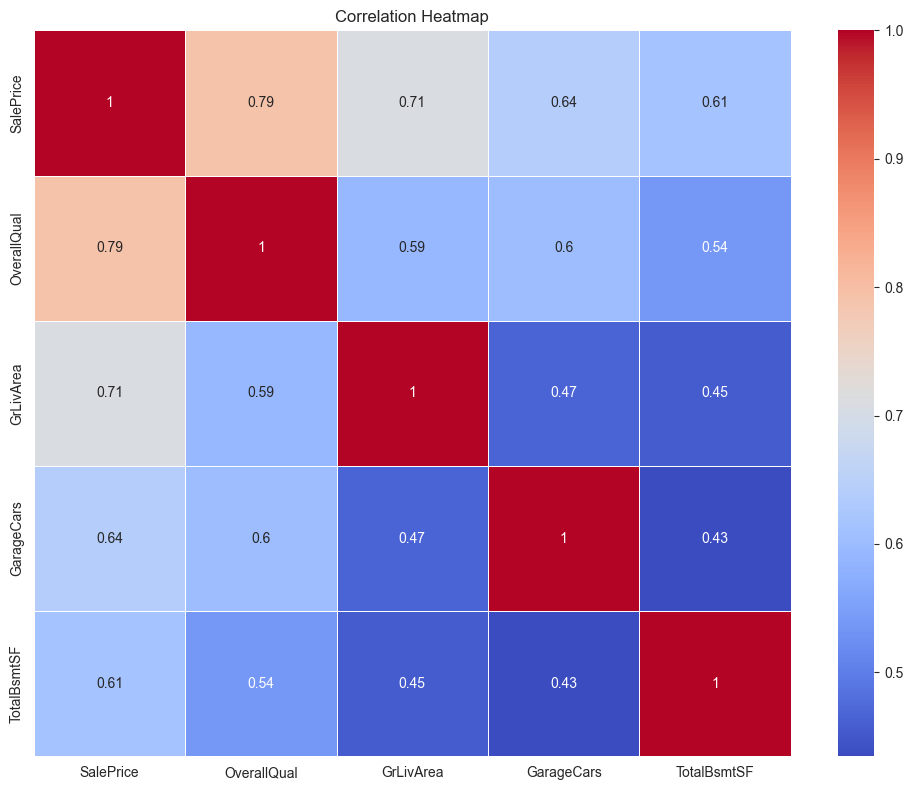

In [20]:
sample_df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]
plt.figure(figsize=(10, 8))
corr_matrix = sample_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


Data Preprocessing

In [21]:
#Set the taarget 
target = train_df['SalePrice']
train_df = train_df.drop(['SalePrice'], axis=1)

In [22]:
# column -> median
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())

# now columns -> mode
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])


In [23]:
# Convert categorical variables to numerics
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [24]:
# Align the train and test dataframes by the columns
train_df, test_df = train_df.align(test_df, join='left', axis=1)

In [25]:
# missing value -> 0
test_df = test_df.fillna(0)

# Reattach target var
train_df['SalePrice'] = target

# Clean Data:
print(train_df.head())
print(test_df.head())

   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      0         3   
1   2          20         3         80.0     9600       1      0         3   
2   3          60         3         68.0    11250       1      0         0   
3   4          70         3         60.0     9550       1      0         0   
4   5          60         3         84.0    14260       1      0         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...         0       2      2            2        0   
1            3          0  ...         0       2      2            2        0   
2            3          0  ...         0       2      2            2        0   
3            3          0  ...         0       2      2            2        0   
4            3          0  ...         0       2      2            2        0   

   MoSold  YrSold  SaleType  SaleCondition  

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Separate the features and target variable from the training data
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

In [28]:
# Split the training data into a training set and a validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Initialize the model
model = LinearRegression()

In [30]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid)

In [31]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error: {mae}")

# Make predictions on the test set
test_predictions = model.predict(test_df)

Mean Absolute Error: 21585.481490978334


In [32]:
#MAE is too high!!!!

In [33]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

In [34]:
# in linear reg, negatives might take place
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: max(0, x))

# Save submission file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!


In [35]:
#4600 rank, we can do better in the kaggle leaderboard

In [36]:
#Random Forest
#Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [37]:
# Training
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_valid)

In [38]:
# mae
mae_rf = mean_absolute_error(y_valid, y_pred_rf)
print(f"Random Forest Mean Absolute Error: {mae_rf}")

Random Forest Mean Absolute Error: 17732.093493150685


In [39]:
#improvement!
# Make predictions on the test set
test_predictions_rf = rf_model.predict(test_df)

In [40]:
#new model
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [41]:
# models init
lr = LinearRegression()
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=200, max_features='sqrt', max_depth=None, min_samples_split=5, min_samples_leaf=1, random_state=42)

In [42]:
# Combine them into a Voting Regressor
voting_reg = VotingRegressor(estimators=[('lr', lr), ('gbr', gbr), ('rf', rf)])

In [43]:
voting_reg.fit(X_train, y_train)

# prediction on valid. set
y_pred_voting = voting_reg.predict(X_valid)

In [44]:
# Calc mae
mae_voting = mean_absolute_error(y_valid, y_pred_voting)
print(f"Voting Regressor Mean Absolute Error: {mae_voting}")

Voting Regressor Mean Absolute Error: 16661.763145186644


In [45]:
#wait whoa, that is a jump

In [46]:
# Make predictions on the test set
test_predictions_voting = voting_reg.predict(test_df)

# prepare submission
submission_voting = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions_voting
})

# negatives
submission_voting['SalePrice'] = submission_voting['SalePrice'].apply(lambda x: max(0, x))

# Saving the submission file
submission_voting.to_csv('submission_voting.csv', index=False)
print("Voting Regressor submission file created successfully!")

Voting Regressor submission file created successfully!


In [47]:
#new_models
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [48]:
# Define parameter grids for each model
param_grid_lr = {
    'regressor__fit_intercept': [True, False]
}

param_grid_gbr = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

In [49]:

# Create pipelines for each model
pipeline_lr = Pipeline([('regressor', LinearRegression())])
pipeline_gbr = Pipeline([('regressor', GradientBoostingRegressor(random_state=42))])
pipeline_rf = Pipeline([('regressor', RandomForestRegressor(random_state=42))])

In [50]:
# Grid search for each model
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gbr = GridSearchCV(pipeline_gbr, param_grid_gbr, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

In [51]:

# Fit and get the best estimators
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

grid_gbr.fit(X_train, y_train)
best_gbr = grid_gbr.best_estimator_

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Best parameters for Linear Regression:", grid_lr.best_params_)
print("Best parameters for Gradient Boosting Regressor:", grid_gbr.best_params_)
print("Best parameters for Random Forest Regressor:", grid_rf.best_params_)

Best parameters for Linear Regression: {'regressor__fit_intercept': False}
Best parameters for Gradient Boosting Regressor: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
Best parameters for Random Forest Regressor: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}


In [52]:
# Combine the best estimators into a Voting Regressor
voting_reg = VotingRegressor(estimators=[('lr', best_lr), ('gbr', best_gbr), ('rf', best_rf)])

# Fit
voting_reg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_voting = voting_reg.predict(X_valid)

# Calculate the mae
mae_voting = mean_absolute_error(y_valid, y_pred_voting)
print(f"Voting Regressor Mean Absolute Error: {mae_voting}")

Voting Regressor Mean Absolute Error: 16501.010349959808


In [53]:
# Make predictions on the test set
test_predictions_voting = voting_reg.predict(test_df)

Additional Hyperparameter Tuning with RandomizedSearchCV


In [55]:
# Define broader parameter grids for RandomizedSearchCV
param_dist_gbr = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7, 9]
}

param_dist_rf = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

Importing

In [56]:
from sklearn.model_selection import RandomizedSearchCV


In [57]:

# Randomized search for each model
random_gbr = RandomizedSearchCV(pipeline_gbr, param_dist_gbr, cv=3, scoring='neg_mean_absolute_error', n_iter=20, random_state=42, n_jobs=-1)
random_rf = RandomizedSearchCV(pipeline_rf, param_dist_rf, cv=3, scoring='neg_mean_absolute_error', n_iter=20, random_state=42, n_jobs=-1)

# Fit and get the best estimators
random_gbr.fit(X_train, y_train)
best_gbr_random = random_gbr.best_estimator_

random_rf.fit(X_train, y_train)
best_rf_random = random_rf.best_estimator_

print("Best parameters for Gradient Boosting Regressor with RandomizedSearchCV:", random_gbr.best_params_)
print("Best parameters for Random Forest Regressor with RandomizedSearchCV:", random_rf.best_params_)

Best parameters for Gradient Boosting Regressor with RandomizedSearchCV: {'regressor__n_estimators': 300, 'regressor__max_depth': 3, 'regressor__learning_rate': 0.1}
Best parameters for Random Forest Regressor with RandomizedSearchCV: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}


In [58]:
# Combine the best estimators into a Voting Regressor
voting_reg_random = VotingRegressor(estimators=[('lr', best_lr), ('gbr', best_gbr_random), ('rf', best_rf_random)])

# Fit the ensemble model
voting_reg_random.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_voting_random = voting_reg_random.predict(X_valid)

# Calculate the mae
mae_voting_random = mean_absolute_error(y_valid, y_pred_voting_random)
print(f"Voting Regressor with RandomizedSearchCV Mean Absolute Error: {mae_voting_random}")

Voting Regressor with RandomizedSearchCV Mean Absolute Error: 16490.4629970266


In [59]:
# Making predictions on the test set
test_predictions_voting_random = voting_reg_random.predict(test_df)

# Prepare the submission file
submission_voting_random = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions_voting_random
})

# No negative predictions
submission_voting_random['SalePrice'] = submission_voting_random['SalePrice'].apply(lambda x: max(0, x))

# Now we save the submission file
submission_voting_random.to_csv('submission.csv', index=False)
print("Voting Regressor with RandomizedSearchCV submission file created successfully!")

Voting Regressor with RandomizedSearchCV submission file created successfully!


Plot Actual Prices vs Predicted Prices

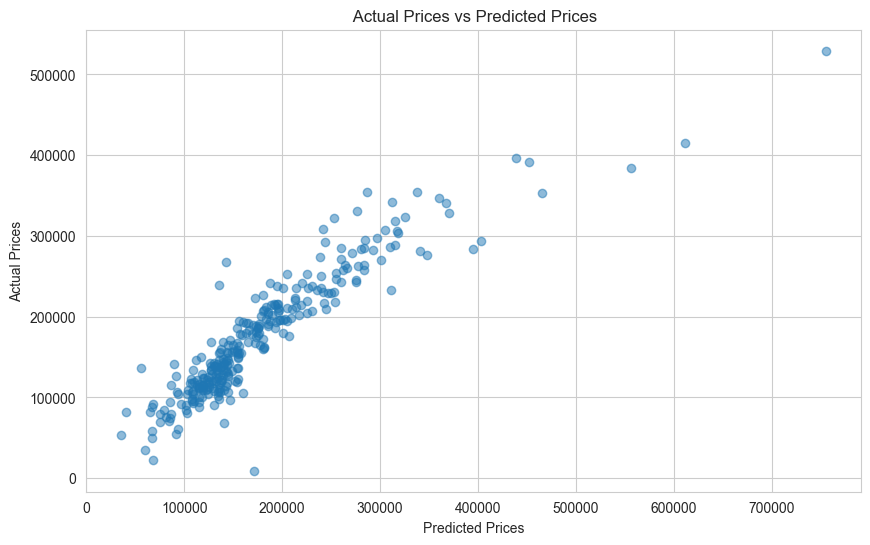

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.5)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [85]:
X = X_train  
y_true = y_train  

In [86]:
y_pred = voting_reg.predict(X)

In [87]:
rmse = root_mean_squared_error(y_true, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 15778.17916776444


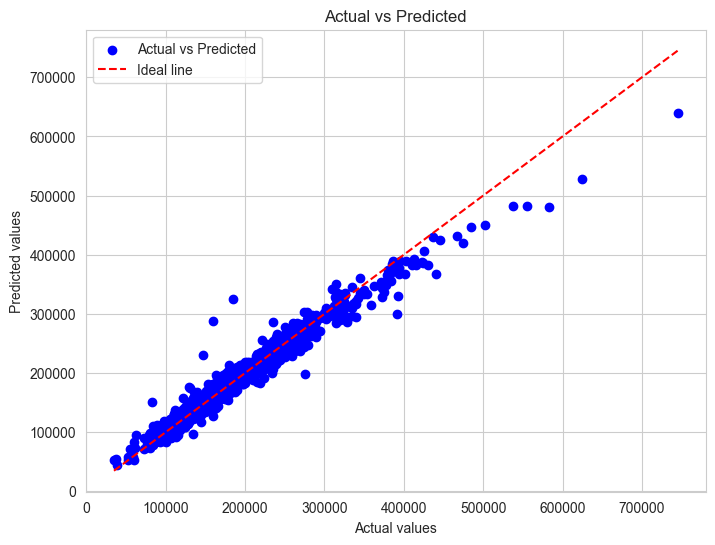

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()
